In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
da = pd.read_csv('titanic.csv')
db = pd.read_csv('IRIS.csv')
dc = sns.load_dataset('tips')
dd = sns.load_dataset('flights')

# 1. Scatter Plot (Numerical vs Numerical)

In [3]:
dc.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
dc.duplicated().sum()

1

In [6]:
dc.drop_duplicates(keep=False, inplace=True)

In [7]:
dc.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
dc.describe()

,total_bill,tip,size
count,242.000000,242.000000,242.000000
mean,19.842025,3.006529,2.574380
std,8.917698,1.386363,0.953615
min,3.070000,1.000000,1.000000
25%,13.397500,2.000000,2.000000
50%,17.815000,2.960000,2.000000
75%,24.222500,3.587500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
dc.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_17204\585021669.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dc.corr()


,total_bill,tip,size
total_bill,1.000000,0.674252,0.596854
tip,0.674252,1.000000,0.487491
size,0.596854,0.487491,1.000000


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

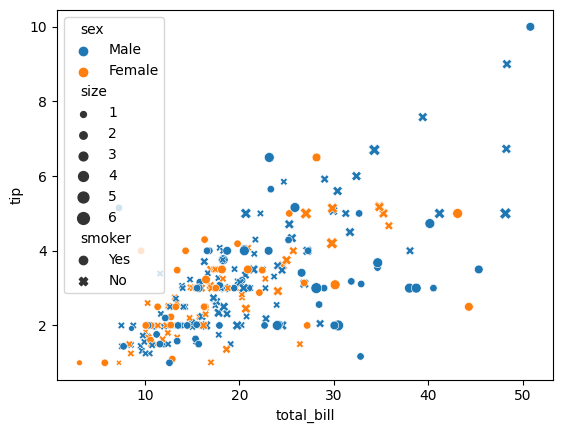

In [10]:
sns.scatterplot(x=dc.total_bill, y=dc.tip,hue=dc['sex'], style=dc['smoker'], size=dc['size'])

In [11]:
dc[dc['smoker']=='No'].value_counts().sum()

151

# Categorical vs Numerical

# Bar Plot

In [12]:
da.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

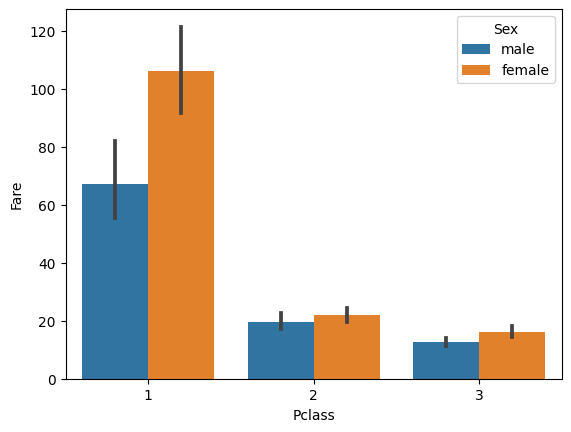

In [13]:
sns.barplot(x=da['Pclass'], y=da['Fare'], hue=da['Sex'])

# Boxplot

<AxesSubplot: xlabel='Sex', ylabel='Age'>

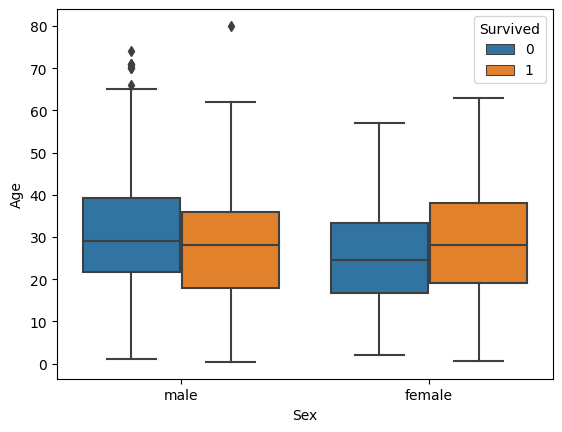

In [14]:
sns.boxplot(x=da['Sex'], y=da['Age'], hue=da['Survived'])

# Distplot

C:\Users\PC\AppData\Local\Temp\ipykernel_17204\4122172750.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da[da['Survived']==1]['Age'],hist=False)
C:\Users\PC\AppData\Local\Temp\ipykernel_17204\4122172750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da[da['Survived']

<AxesSubplot: xlabel='Age', ylabel='Density'>

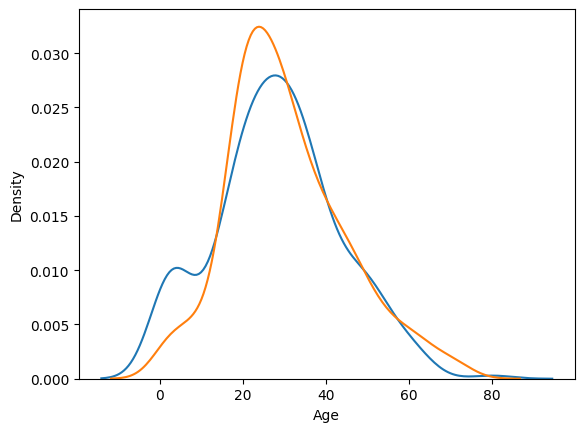

In [15]:
sns.distplot(da[da['Survived']==1]['Age'],hist=False)
sns.distplot(da[da['Survived']==0]['Age'],hist=False)

# Categorical VS Categorical

# HeatMap

In [16]:
pd.crosstab(da['Pclass'], da['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot: xlabel='Survived', ylabel='Pclass'>

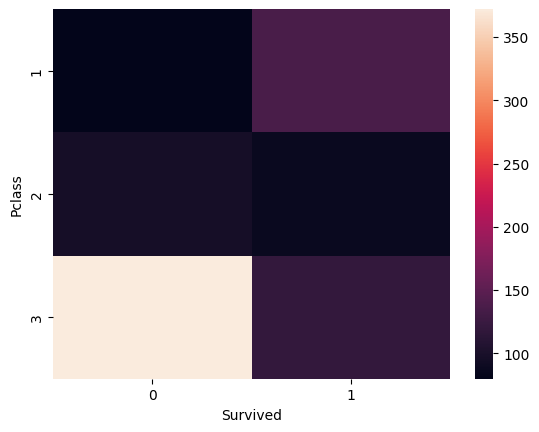

In [17]:
sns.heatmap(pd.crosstab(da['Pclass'], da['Survived']))

C:\Users\PC\AppData\Local\Temp\ipykernel_17204\126152348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (da.groupby('Pclass').mean()['Survived']*100).plot(kind='bar')


<AxesSubplot: xlabel='Pclass'>

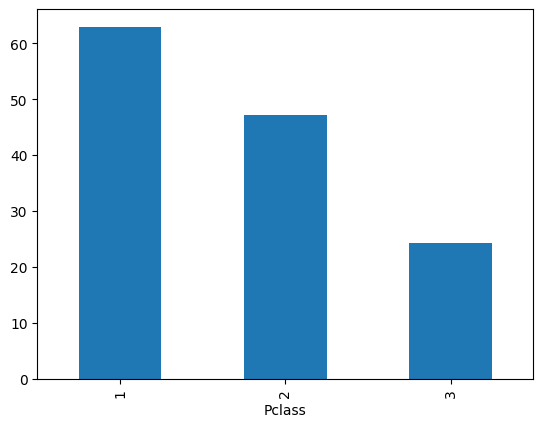

In [18]:
(da.groupby('Pclass').mean()['Survived']*100).plot(kind='bar')

C:\Users\PC\AppData\Local\Temp\ipykernel_17204\35123270.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (da.groupby('Sex').mean()['Survived']*100).plot(kind='bar')


<AxesSubplot: xlabel='Sex'>

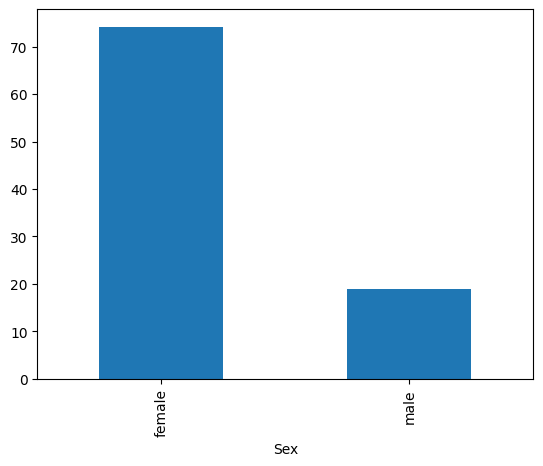

In [33]:
(da.groupby('Sex').mean()['Survived']*100).plot(kind='bar')

# ClusterMap

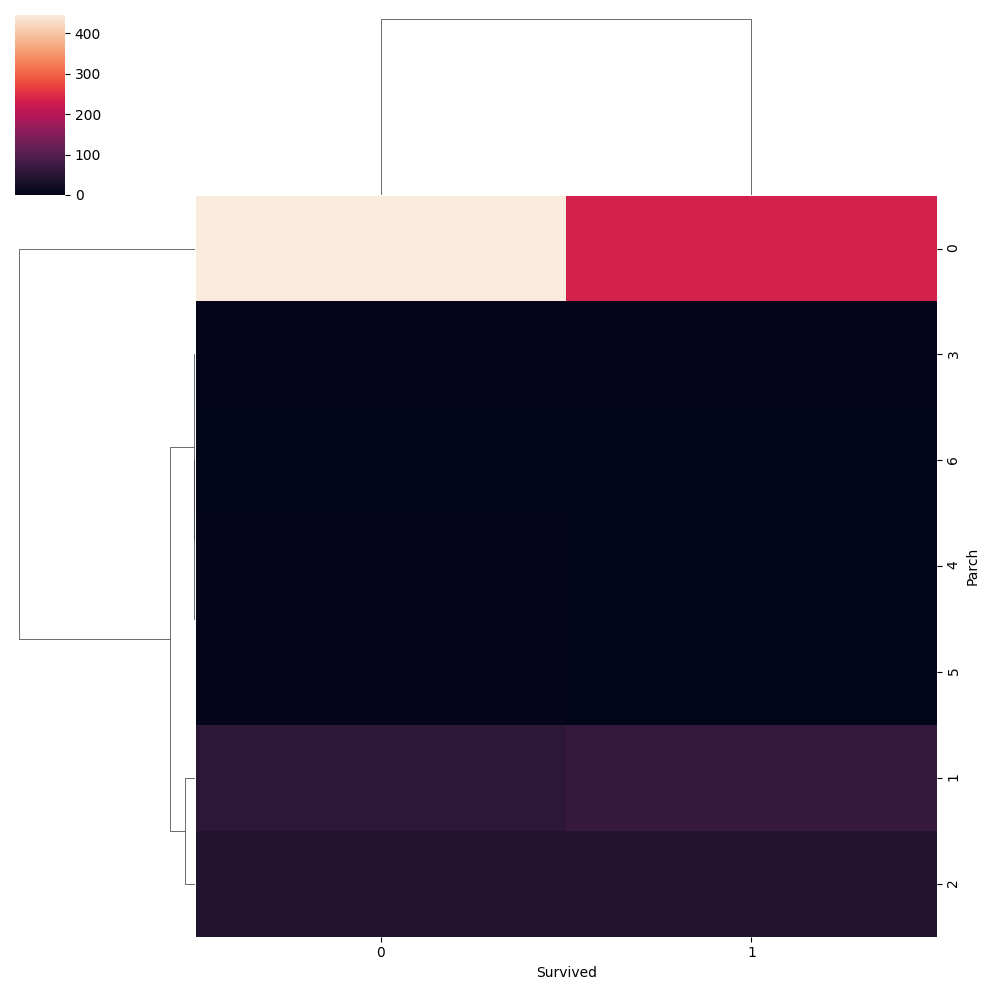

In [64]:
sns.clustermap(pd.crosstab(da['Parch'], da['Survived']))

In [65]:
pd.crosstab(da['Parch'], da['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [5]:
dd

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [16]:
dd.groupby('year').sum().reset_index()

C:\Users\PC\AppData\Local\Temp\ipykernel_15868\3512175955.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dd.groupby('year').sum().reset_index()


,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572
